In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob

from helpers.load_helpers import swithcols
path = os.getcwd()
print(path)

C:\Users\enrik\Desktop\Mabomba\Studie\MasterCS\Thesis\code\jointpdf\python3\experiments


In [2]:
# correct path to right experiment folder
folder = 'validation'
os.chdir(folder)

In [3]:
files = glob.glob("*.pkl")
files_dataframes = [pd.read_pickle(f) for f in files]
d = pd.concat(files_dataframes)
d = swithcols(['systemID','runID','syn_info','parX'],d)
d

,systemID,runID,syn_info,parX,all_cost,tot_repeats,exp_sort,no_test,srv_ids,I(Y;S),...,states,num_srvs,summed_modulo,systems,tol,rowfolder,lenY,lenX,folder,multi
0,0,0.0,0.000000,"[0.3129835669090818, 0.26229357323127267, 0.34...","[[0.7353188829300963], [0.7353188829300963], [...",1,python2,False,[],[],...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
1,1,0.0,0.000000,"[0.5537130672635405, 0.15268179798266923, 0.48...","[[0.4528151236538353], [0.4528151236538353], [...",1,python2,False,[],[],...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
2,2,0.0,0.217169,"[0.3919122762945993, 0.7568673503648626, 0.315...","[[0.5095088166448496], [1.0000161342824285]]",1,python2,False,"[[0], [0]]","[0.21715912338268883, 9.714318400355637e-06]",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
3,3,0.0,0.023880,"[0.656007286076378, 0.21387073463013384, 0.932...","[[0.8753707997507245], [1.1494000208745423], [...",1,python2,False,"[[0], [0]]","[0.02387981711137499, 4.861930744670673e-07]",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
4,4,0.0,0.005805,"[0.7551214221571221, 0.7848253537974377, 0.765...","[[0.7390903152766144], [0.7390903152766144], [...",1,python2,False,[[0]],[0.0058049034290543755],...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,20,3.0,0.134711,"[0.3033426773366994, 0.4296430207761184, 0.566...","[[0.7886870996293072], [0.6283518049763738], [...",1,python3,True,"[[0], [0]]","[0.08019137940696597, 0.05451939747946044]",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
21,21,3.0,0.040960,"[0.4470759815089909, 0.37878388624064463, 0.15...","[[0.6234991212825491], [0.7767013121496901], [...",1,python3,True,[[0]],[0.0409602781819256],...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
22,22,3.0,0.052937,"[0.2663794801502236, 0.6655825610555642, 0.533...","[[0.6424320942534186], [0.7774828417609756], [...",1,python3,True,[[0]],[0.05293712720583921],...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
23,23,3.0,0.070759,"[0.2613067726829713, 0.5839062916979727, 0.255...","[[0.5168148739514171], [0.5820295368692168], [...",1,python3,True,"[[0], [0]]","[0.02855768817945714, 0.042201440562435355]",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False


In [4]:
def sort_systems_runs(unsorted_df):
    dfs = []
    temp = unsorted_df.copy()
    for i in temp['states'].unique():
        d = temp[temp['states']==i]
        prevs = {}
        prev_systems = []
        for j, sys in enumerate(d['parXY']):
#             print(sys,prevs)
            if len(prev_systems)>0:
                prev_id = [k for k,p in enumerate(prev_systems) if np.allclose(np.array(p),np.array(sys))]
#                 print("PREV ID",prev_id,prev_systems)
                if len(prev_id)==0:
                    prev_systems.append(sys)
                    cur = len(prev_systems)-1
                    prevs[cur] = [0]
                    d['systemID'].iloc[j] = cur
                    d['runID'].iloc[j] = 0
                else:
                    assert len(prev_id) == 1
                    cur = prevs[prev_id[0]]
                    cur.append(cur[-1]+1)
                    d['systemID'].iloc[j] = prev_id[0]
                    d['runID'].iloc[j] = cur[-1]
            else:
                prev_systems.append(sys)
                cur = 0
                prevs[cur] = [0]
                d['systemID'].iloc[j] = 0
                d['runID'].iloc[j] = 0
        dfs.append(d)
    return pd.concat(dfs)

d_sorted = sort_systems_runs(d)

C:\Users\enrik\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\enrik\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\enrik\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

## Compare syn info and runtime of python2/python3

In [5]:
def delta_synruntime(df):
    """Calculate for all runs of a given system,
    the difference in syn_info and runtime with
    the first run"""
    
    zero = df[df['runID']==0].iloc[[0]]
    tot_runtime = float(zero['tot_runtime'].iloc[0])
    syn_info = float(zero['syn_info'].iloc[0])
    t = []
    for i in list(set(list(df['runID'])))[1:]:
        t.append(df[df['runID']==i].iloc[[0]])
    t = pd.concat(t)

    t['delta_syn'] = t['syn_info'].apply(lambda x:x-syn_info)
    t['delta_totruntime'] = t['tot_runtime'].apply(lambda x:x-tot_runtime)

    return swithcols(['selection','systemID','runID','delta_syn','delta_totruntime','tot_repeats','no_test'],t)

def select(d,select_args):
    ts = []
    for i, s in enumerate(select_args):
        keys = list(s.keys())
        values = list(s.values())
        if 'False' in values:
            ix = values.index('False')
            s[keys[ix]] = False
        if 'True' in values:
            ix = values.index('True')
            s[keys[ix]] = True

        t = d.loc[(d[keys[0]]==s[keys[0]])]
        for k in keys[1:]:
            t = t.loc[(t[k]==s[k])]
        t['selection'] = i
        ts.append(t)        
    return pd.concat(ts)
    
def get_delta(d,select_args):
    df = d.copy()
    df = select(df,select_args)
    df = [delta_synruntime(df[df['systemID']==i]) for i in set(list(df['systemID']))]
    return pd.concat(df)

In [6]:
select_args = [{'exp_sort':'python2','no_test':'False'},{'exp_sort':'python3','no_test':'False'},
              {'exp_sort':'python3','no_test':'True'}]
df = get_delta(d_sorted,select_args)
df
# df

,selection,systemID,runID,delta_syn,delta_totruntime,tot_repeats,no_test,syn_info,parX,all_cost,...,states,num_srvs,summed_modulo,systems,tol,rowfolder,lenY,lenX,folder,multi
0,0,0,1.0,0.000000e+00,0.179000,1,False,0.000000,"[0.3129835669090818, 0.26229357323127267, 0.34...","[[0.735318882930096], [0.735318882930096], [0....",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
0,0,0,2.0,3.229777e-02,19.021000,1,False,0.032298,"[0.26883950607185103, 0.6967362641030489, 0.16...","[[0.6532005745876814], [0.6488390271497827], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
0,1,0,3.0,0.000000e+00,19.393040,1,False,0.000000,"[0.26883950607185103, 0.6967362641030489, 0.16...","[[0.6532005461292557], [0.6488390271163731], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
0,1,0,4.0,0.000000e+00,18.518068,1,False,0.000000,"[0.26883950607185103, 0.6967362641030489, 0.16...","[[0.6532005461292557], [0.6488390271163731], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
0,2,0,5.0,0.000000e+00,7.698880,1,True,0.000000,"[0.26883950607185103, 0.6967362641030489, 0.16...","[[0.6532005461292557], [0.6488390271163731], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,58,2.0,-2.480482e-10,6.167793,1,False,0.070759,"[0.2613067726829713, 0.5839062916979727, 0.255...","[[0.5168148739514171], [0.5820295368692168], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
23,2,58,3.0,-2.480482e-10,-6.101398,1,True,0.070759,"[0.2613067726829713, 0.5839062916979727, 0.255...","[[0.5168148739514171], [0.5820295368692168], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False
24,0,59,1.0,1.643916e-08,0.339000,1,False,0.057832,"[0.2311225751870528, 0.47677256937855383, 0.59...","[[0.8453499406834744], [0.6040218943324438], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
24,1,59,2.0,5.779933e-07,3.001452,1,False,0.057833,"[0.23112257518705281, 0.47677256937855383, 0.5...","[[0.8021762719793961], [0.6040218955077381], [...",...,3,1,False,25,0.05,/row_data/,1,2,./validation/,False


## Absolute delta differences

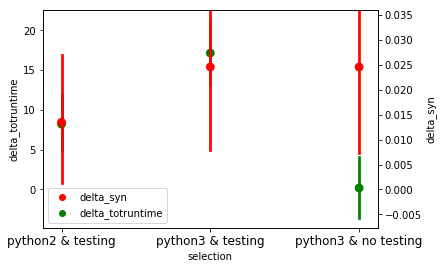

In [7]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

fig = plt.figure()
ax = fig.add_subplot(111)

# lns1 = sns.scatterplot(y=df['delta_totruntime'],x=df['selection'],color="g")
# ax2 = ax.twinx()
# lns2 = sns.scatterplot(y=df['delta_syn'],x=df['selection'], color="r", ax=ax2)

lns1 = sns.pointplot(y=df['delta_totruntime'],x=df['selection'],color="g",join=False)
ax2 = ax.twinx()
lns2 = sns.pointplot(y=df['delta_syn'],x=df['selection'], color="r", ax=ax2,join=False)

align_yaxis(lns1, 0, lns2, 0)
plt.scatter([],[], color='red', label='delta_syn')
plt.scatter([],[], color='green', label='delta_totruntime')
plt.legend(loc=3)

ax.set_xticks(list(set(df['selection'])))
x_ticks_labels = ['python2 & testing','python3 & testing','python3 & no testing']
ax.set_xticklabels(x_ticks_labels, rotation=0, fontsize=12)
plt.show()

In [8]:
# https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec, title=None):
        self.fig = fig
        self.title = title
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1],self.title)
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs,title=None):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)
        if title:
            ax.set_title(title)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [11]:
df = df[df['states']==2]


,selection,systemID,runID,delta_syn,delta_totruntime,tot_repeats,no_test,syn_info,parX,all_cost,...,states,num_srvs,summed_modulo,systems,tol,rowfolder,lenY,lenX,folder,multi
0,0,0,1.0,0.000000e+00,0.179,1,False,0.000000,"[0.3129835669090818, 0.26229357323127267, 0.34...","[[0.735318882930096], [0.735318882930096], [0....",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
1,0,1,1.0,0.000000e+00,0.074,1,False,0.000000,"[0.5537130672635406, 0.1526817979826692, 0.485...","[[0.45281512365383597], [0.4528151236538356], ...",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
2,0,2,1.0,-8.307055e-06,1.333,1,False,0.217161,"[0.3919122762945993, 0.7568673503648629, 0.315...","[[0.5095088166448503], [1.0000031029100214]]",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
3,0,3,1.0,-2.591544e-07,-1.513,1,False,0.023880,"[0.656007286076378, 0.21387073463013384, 0.932...","[[0.8753707997505427], [1.14940002455478], [1....",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
4,0,4,1.0,-2.310171e-09,-0.217,1,False,0.005805,"[0.7551214221571219, 0.7848253537974379, 0.765...","[[0.7390903152766144], [0.7390903152766144], [...",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
5,0,5,1.0,0.000000e+00,0.095,1,False,0.000000,"[0.6086688122170085, 0.47136041762710024, 0.04...","[[0.9739825047180117], [0.9739825047180117], [...",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
6,0,6,1.0,0.000000e+00,-0.105,1,False,0.000000,"[0.5429685289779302, 0.6735852422179203, 0.646...","[[0.5228277932029785], [0.5228277932029785], [...",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
7,0,7,1.0,0.000000e+00,0.240,1,False,0.000000,"[0.411070764625195, 0.3098466122044888, 0.4997...","[[0.5487691099569935], [0.5487691099569935], [...",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
8,0,8,1.0,0.000000e+00,0.313,1,False,0.000000,"[0.630876376698664, 0.6633796808976797, 0.5275...","[[0.5403821604298804], [0.5403821604298804], [...",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN
9,0,9,1.0,9.039515e-07,-0.516,1,False,0.001683,"[0.17792077824242697, 0.09074586783135462, 0.7...","[[0.973787017122772], [0.9737870174116221], [0...",...,2,1,False,25,0.05,/row_data/,1,2,./validation/,NaN


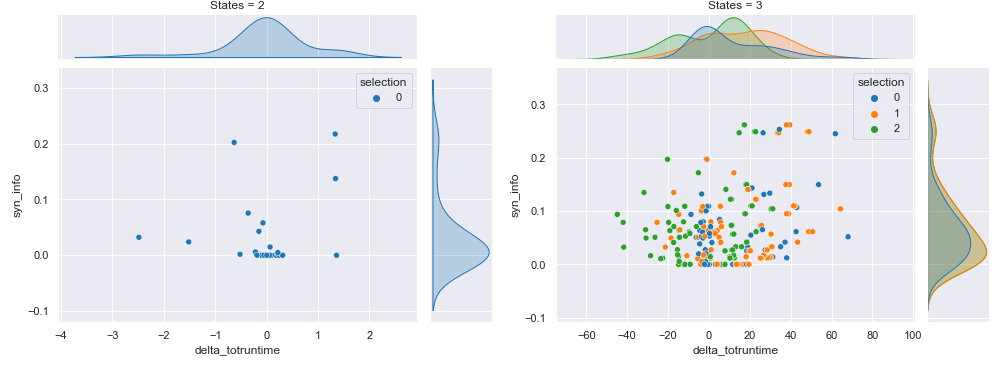

In [14]:
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()

states = list(set(df['states'].values))
fig = plt.figure(figsize=(14,7))
gs = gridspec.GridSpec(1,len(states))

for i,s in enumerate(states):
    g = sns.jointplot(data=df[df['states']==s], x="delta_totruntime", y="syn_info", 
                      hue="selection",palette='tab10', space=0)
    
    m = SeabornFig2Grid(g, fig, gs[i],"States = "+str(s))

gs.tight_layout(fig)
gs.update(top=0.7)

plt.show()

## Code snippets

In [130]:
# g = sns.FacetGrid(df, col="try")
# g.map_dataframe(sns.scatterplot, x="tot_repeats",y="all_cost")
# g.add_legend()
# g = sns.FacetGrid(df, col="try")
# g.map(sns.pointplot, 'tot_repeats', "tot_runtime",fit_reg=False,x_jitter=.1)

# data2 = pd.melt(df, id_vars=['exp_sort'], value_vars=['delta_syn', 'delta_totruntime'], ignore_index=True)
# data2